<p align="center"><img src="https://i.imgur.com/pSDefTx.jpg"></p>

## Data Extraction

In [1]:
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

# request package to GET from API endpoint
r = requests.get(url)

# transform request into json object
json = r.json()

json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [2]:
teams_df = pd.DataFrame(json['teams'])
elements_df = pd.DataFrame(json['elements'])
element_types_df = pd.DataFrame(json['element_types'])

## Data Exploration

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
elements_df

chance_of_playing_next_round  chance_of_playing_this_round    code  \
0                             NaN                           NaN   80201   
1                             0.0                           0.0  115918   
2                             0.0                           0.0   47431   
3                           100.0                         100.0   54694   
4                             NaN                           NaN   58822   
5                           100.0                         100.0   59966   
6                             0.0                           0.0   84450   
7                           100.0                         100.0   92371   
8                             0.0                           0.0   98745   
9                             NaN                           NaN  101184   
10                            0.0                           0.0  111457   
11                          100.0                         100.0  153256   
12                            NaN                           NaN  154043   
13                          100.0                         100.0  156074   
14                          100.0                         100.0  167199   
15                          100.0                         100.0  192895   
16                          100.0                         100.0  195735   
17                            0.0                           0.0  198849   
18                          100.0                         100.0  205533   
19                          100.0                         100.0  209289   
20                          100.0                          75.0  223340   
21                          100.0                         100.0  226597   
22                            0.0                           0.0  233963   
23                            0.0                           0.0  242166   
24                          100.0                         100.0  444145   
25                            0.0                           0.0  462424   
26                          100.0                         100.0  198869   
27                            NaN                           NaN  437626   
28                            NaN                           NaN  437742   
29                          100.0                         100.0  232223   
30                            0.0                           0.0  200641   
31                            NaN                           NaN  463748   
32                          100.0                         100.0  184029   
33                            NaN                           NaN  225321   
34                            NaN                           NaN  220682   
35                            NaN                           NaN  223723   
36                            NaN                           NaN   79852   
37                            0.0                           0.0   85242   
38                          100.0                         100.0   98980   
39                            0.0                           0.0  108156   
40                            0.0                           0.0  110504   
41                          100.0                         100.0  122775   
42                          100.0                         100.0  122806   
43                            NaN                           NaN  123354   
44                            0.0                           0.0  148508   
45                          100.0                         100.0  149484   
46                           25.0                           NaN  169359   
47                          100.0                         100.0  178301   
48                          100.0                         100.0  184704   
49                            NaN                           NaN  193488   
50                          100.0                         100.0  195546   
51                          100.0                         100.0  199796   
52                          10

In [4]:
# drop players that are unavailable
elements_df.drop(elements_df[elements_df.status=='u'].index, inplace=True)
elements_df.reset_index(inplace=True)

In [5]:
elements_df.columns

Index(['index', 'chance_of_playing_next_round', 'chance_of_playing_this_round',
       'code', 'cost_change_event', 'cost_change_event_fall',
       'cost_change_start', 'cost_change_start_fall', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'id', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo',
       'points_per_game', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'influence_rank', 'influence_rank_type',
       'creativity_rank', 'creativity_rank_type', 'thr

In [6]:
# identify players who are in the dreamteam
dreamteam_df = elements_df[['dreamteam_count', 'element_type', 'in_dreamteam', 'now_cost', 'points_per_game', 'selected_by_percent', 'total_points', 'value_form', 'value_season', 'web_name']]
dreamteam_df = dreamteam_df[dreamteam_df['in_dreamteam']==True].sort_values(by=['element_type','points_per_game'], ascending=[True,True])
dreamteam_df

dreamteam_count  element_type  in_dreamteam  now_cost points_per_game  \
159                0             1          True        63             5.0   
291                2             2          True        66             5.1   
146                2             2          True        61             5.5   
322                4             2          True        68             5.9   
299                4             2          True        80             7.5   
158                4             2          True        62             7.6   
295                6             3          True       130            10.4   
292                1             3          True       120             5.4   
302                1             3          True        79             5.8   
232                3             4          True       107             5.4   
494                4             4          True        55             5.6   

    selected_by_percent  total_points value_form value_season  \
159                20.2            65        0.6         10.3   
291                17.7            71        0.9         10.8   
146                22.2            71        0.8         11.6   
322                38.4            82        1.1         12.1   
299                39.4            90        1.2         11.2   
158                34.0            76        0.8         12.3   
295                73.0           146        0.7         11.2   
292                 4.4            76        0.4          6.3   
302                28.7            76        1.0          9.6   
232                26.9            76        0.4          7.1   
494                18.4            73        1.6         13.3   

             web_name  
159             Mendy  
291          van Dijk  
146           Rüdiger  
322           Cancelo  
299  Alexander-Arnold  
158             James  
295             Salah  
292              Mané  
302              Jota  
232             Vardy  
494            Dennis

In [7]:
# cost of the current dreamteam
dreamteam_df.now_cost.sum()

891

In [8]:
main_df = elements_df[['element_type','now_cost','points_per_game','selected_by_percent','team','total_points',
                       'value_form','value_season','web_name','minutes','goals_scored','assists','clean_sheets',
                       'goals_conceded','own_goals','penalties_saved','penalties_missed','yellow_cards','red_cards',
                       'saves','bonus','bps','influence','creativity','threat','ict_index']]

In [9]:
element_types_df

id  plural_name plural_name_short singular_name singular_name_short  \
0   1  Goalkeepers               GKP    Goalkeeper                 GKP   
1   2    Defenders               DEF      Defender                 DEF   
2   3  Midfielders               MID    Midfielder                 MID   
3   4     Forwards               FWD       Forward                 FWD   

   squad_select  squad_min_play  squad_max_play  ui_shirt_specific  \
0             2               1               1               True   
1             5               3               5              False   
2             5               2               5              False   
3             3               1               3              False   

  sub_positions_locked  element_count  
0                 [12]             72  
1                   []            216  
2                   []            262  
3                   []             86

In [10]:
teams_df

code  draw  form  id  loss            name  played  points  position  \
0      3     0  None   1     0         Arsenal       0       0         0   
1      7     0  None   2     0     Aston Villa       0       0         0   
2     94     0  None   3     0       Brentford       0       0         0   
3     36     0  None   4     0        Brighton       0       0         0   
4     90     0  None   5     0         Burnley       0       0         0   
5      8     0  None   6     0         Chelsea       0       0         0   
6     31     0  None   7     0  Crystal Palace       0       0         0   
7     11     0  None   8     0         Everton       0       0         0   
8     13     0  None   9     0       Leicester       0       0         0   
9      2     0  None  10     0           Leeds       0       0         0   
10    14     0  None  11     0       Liverpool       0       0         0   
11    43     0  None  12     0        Man City       0       0         0   
12     1     0  None  13     0         Man Utd       0       0         0   
13     4     0  None  14     0       Newcastle       0       0         0   
14    45     0  None  15     0         Norwich       0       0         0   
15    20     0  None  16     0     Southampton       0       0         0   
16     6     0  None  17     0           Spurs       0       0         0   
17    57     0  None  18     0         Watford       0       0         0   
18    21     0  None  19     0        West Ham       0       0         0   
19    39     0  None  20     0          Wolves       0       0         0   

   short_name  strength team_division  unavailable  win  \
0         ARS         4          None        False    0   
1         AVL         3          None        False    0   
2         BRE         3          None        False    0   
3         BHA         3          None        False    0   
4         BUR         2          None        False    0   
5         CHE         5          None        False    0   
6         CRY         3          None        False    0   
7         EVE         3          None        False    0   
8         LEI         3          None        False    0   
9         LEE         3          None        False    0   
10        LIV         5          None        False    0   
11        MCI         5          None        False    0   
12        MUN         4          None        False    0   
13        NEW         2          None        False    0   
14        NOR         2          None        False    0   
15        SOU         3          None        False    0   
16        TOT         4          None        False    0   
17        WAT         2          None        False    0   
18        WHU         4          None        False    0   
19        WOL         3          None        False    0   

    strength_overall_home  strength_overall_away  strength_attack_home  \
0                    1190                   1250                  1110   
1                    1130                   1160                  1110   
2                    1070                   1080                  1130   
3                    1140                   1140                  1160   
4                    1040                   1050                  1040   
5                    1340                   1350                  1330   
6                    1080                   1110                  1110   
7                    1140                   1190                  1120   
8                    1170                   1190                  1100   
9                    1080                   1100                  1060   
10                   1340                   1350                  1290   
11                   1340                   1360                  1340   
12                   1260                   1300                  1160   
13                   1040                   1050                  1030   
14                   1010                   1030         

## Data Preparation

In [11]:
# populate player positions onto the main dataframe
main_df = pd.merge(left=main_df,right=element_types_df[['id','singular_name']],left_on='element_type', right_on='id', how='left')

In [12]:
# populate club names onto the main dataframe
main_df = pd.merge(left=main_df,right=teams_df[['id','name']],left_on='team',right_on='id',how='left')

In [13]:
main_df

element_type  now_cost points_per_game selected_by_percent  team  \
0               1        46             1.3                 0.9     1   
1               4        97             3.3                 3.0     1   
2               2        42             0.3                 0.2     1   
3               4        83             1.8                 1.1     1   
4               3        48             1.0                 0.3     1   
5               2        42             0.5                 0.1     1   
6               2        42             0.5                 0.2     1   
7               2        43             0.0                 0.1     1   
8               3        44             1.8                 0.4     1   
9               3        53             1.5                 0.1     1   
10              2        41             0.0                 0.5     1   
11              3        50             2.7                 0.3     1   
12              2        47             3.0                 3.5     1   
13              3        69             2.9                 0.8     1   
14              4        54             1.0                 0.1     1   
15              3        61             4.9                29.8     1   
16              3        62             3.6                 8.3     1   
17              2        51             5.0                 3.0     1   
18              3        52             3.0                 0.3     1   
19              2        44             3.8                11.9     1   
20              2        43             2.9                 0.8     1   
21              3        48             1.8                 0.2     1   
22              4        48             1.0                 0.3     1   
23              1        40             0.0                 0.5     1   
24              3        54             3.0                 1.3     1   
25              1        49             5.2                13.9     1   
26              1        40             0.0                 0.1     1   
27              2        46             4.3                 4.2     1   
28              1        40             1.0                 3.1     2   
29              1        55             4.2                13.7     2   
30              3        57             1.8                 0.3     2   
31              3        50             1.0                 0.0     2   
32              3        58             3.7                 1.3     2   
33              2        44             4.2                 0.2     2   
34              3        54             0.0                 0.0     2   
35              2        49             3.8                 6.6     2   
36              2        47             2.7                 2.0     2   
37              4        75             3.8                 4.6     2   
38              3        45             1.5                 0.2     2   
39              3        56             2.4                 0.4     2   
40              3        62             2.8                 1.0     2   
41              2        50             3.3                 3.4     2   
42              2        49             2.2                 0.5     2   
43              4        45             1.0                 3.3     2   
44              3        45             3.0                 2.3     2   
45              3        45             2.2                 0.7     2   
46              2        47             2.8                 0.5     2   
47              2        44             1.7                 0.5     2   
48              4        77             4.1                 8.1     2   
49              3        64             3.0                 0.5     2   
50              3        45             0.0                 0.2     2   
51              3        50             1.0                 0.0     2   
52              3        45             1.5                 0.0     2   
53              4        45             1.0                 1.3

In [14]:
# drop irrelevant columns
main_df = main_df.drop(['element_type','team','id_x','id_y'],axis=1)

In [15]:
# rename column names
main_df = main_df.rename(columns = {'singular_name': 'position', 'name': 'club'})

In [16]:
# rearrange columns sequence
main_df = main_df[['web_name','position','club','selected_by_percent',
                   'now_cost','total_points','points_per_game',
                   'minutes','goals_scored','assists','clean_sheets',
                   'goals_conceded','own_goals','penalties_saved',
                   'penalties_missed','yellow_cards','red_cards',
                   'saves','bonus','bps','influence','creativity',
                   'threat','ict_index','value_form','value_season']]
main_df

web_name    position            club selected_by_percent  \
0                Leno  Goalkeeper         Arsenal                 0.9   
1          Aubameyang     Forward         Arsenal                 3.0   
2              Cédric    Defender         Arsenal                 0.2   
3           Lacazette     Forward         Arsenal                 1.1   
4               Xhaka  Midfielder         Arsenal                 0.3   
5                Marí    Defender         Arsenal                 0.1   
6            Chambers    Defender         Arsenal                 0.2   
7           Kolasinac    Defender         Arsenal                 0.1   
8              Elneny  Midfielder         Arsenal                 0.4   
9      Maitland-Niles  Midfielder         Arsenal                 0.1   
10            Holding    Defender         Arsenal                 0.5   
11             Partey  Midfielder         Arsenal                 0.3   
12            Tierney    Defender         Arsenal                 3.5   
13               Pépé  Midfielder         Arsenal                 0.8   
14            Nketiah     Forward         Arsenal                 0.1   
15         Smith Rowe  Midfielder         Arsenal                29.8   
16               Saka  Midfielder         Arsenal                 8.3   
17            Gabriel    Defender         Arsenal                 3.0   
18         Martinelli  Midfielder         Arsenal                 0.3   
19              White    Defender         Arsenal                11.9   
20            Tavares    Defender         Arsenal                 0.8   
21      Sambi Lokonga  Midfielder         Arsenal                 0.2   
22            Balogun     Forward         Arsenal                 0.3   
23               Hein  Goalkeeper         Arsenal                 0.5   
24           Ødegaard  Midfielder         Arsenal                 1.3   
25           Ramsdale  Goalkeeper         Arsenal                13.9   
26            Okonkwo  Goalkeeper         Arsenal                 0.1   
27           Tomiyasu    Defender         Arsenal                 4.2   
28              Steer  Goalkeeper     Aston Villa                 3.1   
29           Martínez  Goalkeeper     Aston Villa                13.7   
30             Traoré  Midfielder     Aston Villa                 0.3   
31             Sanson  Midfielder     Aston Villa                 0.0   
32             McGinn  Midfielder     Aston Villa                 1.3   
33              Hause    Defender     Aston Villa                 0.2   
34          Trézéguet  Midfielder     Aston Villa                 0.0   
35              Mings    Defender     Aston Villa                 6.6   
36            Targett    Defender     Aston Villa                 2.0   
37            Watkins     Forward     Aston Villa                 4.6   
38            Nakamba  Midfielder     Aston Villa                 0.2   
39           El Ghazi  Midfielder     Aston Villa                 0.4   
40            Buendía  Midfielder     Aston Villa                 1.0   
41               Cash    Defender     Aston Villa                 3.4   
42              Konsa    Defender     Aston Villa                 0.5   
43              Davis     Forward     Aston Villa                 3.3   
44       Douglas Luiz  Midfielder     Aston Villa                 2.3   
45             Ramsey  Midfielder     Aston Villa                 0.7   
46              Young    Defender     Aston Villa                 0.5   
47           Tuanzebe    Defender     Aston Villa                 0.5   
48               Ings     Forward     Aston Villa                 8.1   
49             Bailey  Midfielder     Aston Villa                 0.5   
50             Ramsey  Midfielder     Aston Villa                 0.2   
51   Philogene-Bidace  Midfielder     Aston Villa                 0.0   
52        Chukwuemeka  Midfielder     Aston Villa                 0.0   
53             Archer     Forward     Aston Villa                 1.3  

In [17]:
main_df.dtypes

web_name               object
position               object
club                   object
selected_by_percent    object
now_cost                int64
total_points            int64
points_per_game        object
minutes                 int64
goals_scored            int64
assists                 int64
clean_sheets            int64
goals_conceded          int64
own_goals               int64
penalties_saved         int64
penalties_missed        int64
yellow_cards            int64
red_cards               int64
saves                   int64
bonus                   int64
bps                     int64
influence              object
creativity             object
threat                 object
ict_index              object
value_form             object
value_season           object
dtype: object

In [18]:
# convert data types of columns
main_df['selected_by_percent'] = main_df.selected_by_percent.astype(float)
main_df['now_cost'] = main_df['now_cost']/10
main_df['points_per_game'] = main_df.points_per_game.astype(float)
main_df['influence'] = main_df.influence.astype(float)
main_df['creativity'] = main_df.creativity.astype(float)
main_df['threat'] = main_df.threat.astype(float)
main_df['ict_index'] = main_df.ict_index.astype(float)
main_df['value_form'] = main_df.value_form.astype(float)
main_df['value_season'] = main_df.value_season.astype(float)

In [19]:
# add column of sum(value_form + value_season)
main_df['value_form_season'] = main_df['value_form'] + main_df['value_season']
main_df

web_name    position            club  selected_by_percent  \
0                Leno  Goalkeeper         Arsenal                  0.9   
1          Aubameyang     Forward         Arsenal                  3.0   
2              Cédric    Defender         Arsenal                  0.2   
3           Lacazette     Forward         Arsenal                  1.1   
4               Xhaka  Midfielder         Arsenal                  0.3   
5                Marí    Defender         Arsenal                  0.1   
6            Chambers    Defender         Arsenal                  0.2   
7           Kolasinac    Defender         Arsenal                  0.1   
8              Elneny  Midfielder         Arsenal                  0.4   
9      Maitland-Niles  Midfielder         Arsenal                  0.1   
10            Holding    Defender         Arsenal                  0.5   
11             Partey  Midfielder         Arsenal                  0.3   
12            Tierney    Defender         Arsenal                  3.5   
13               Pépé  Midfielder         Arsenal                  0.8   
14            Nketiah     Forward         Arsenal                  0.1   
15         Smith Rowe  Midfielder         Arsenal                 29.8   
16               Saka  Midfielder         Arsenal                  8.3   
17            Gabriel    Defender         Arsenal                  3.0   
18         Martinelli  Midfielder         Arsenal                  0.3   
19              White    Defender         Arsenal                 11.9   
20            Tavares    Defender         Arsenal                  0.8   
21      Sambi Lokonga  Midfielder         Arsenal                  0.2   
22            Balogun     Forward         Arsenal                  0.3   
23               Hein  Goalkeeper         Arsenal                  0.5   
24           Ødegaard  Midfielder         Arsenal                  1.3   
25           Ramsdale  Goalkeeper         Arsenal                 13.9   
26            Okonkwo  Goalkeeper         Arsenal                  0.1   
27           Tomiyasu    Defender         Arsenal                  4.2   
28              Steer  Goalkeeper     Aston Villa                  3.1   
29           Martínez  Goalkeeper     Aston Villa                 13.7   
30             Traoré  Midfielder     Aston Villa                  0.3   
31             Sanson  Midfielder     Aston Villa                  0.0   
32             McGinn  Midfielder     Aston Villa                  1.3   
33              Hause    Defender     Aston Villa                  0.2   
34          Trézéguet  Midfielder     Aston Villa                  0.0   
35              Mings    Defender     Aston Villa                  6.6   
36            Targett    Defender     Aston Villa                  2.0   
37            Watkins     Forward     Aston Villa                  4.6   
38            Nakamba  Midfielder     Aston Villa                  0.2   
39           El Ghazi  Midfielder     Aston Villa                  0.4   
40            Buendía  Midfielder     Aston Villa                  1.0   
41               Cash    Defender     Aston Villa                  3.4   
42              Konsa    Defender     Aston Villa                  0.5   
43              Davis     Forward     Aston Villa                  3.3   
44       Douglas Luiz  Midfielder     Aston Villa                  2.3   
45             Ramsey  Midfielder     Aston Villa                  0.7   
46              Young    Defender     Aston Villa                  0.5   
47           Tuanzebe    Defender     Aston Villa                  0.5   
48               Ings     Forward     Aston Villa                  8.1   
49             Bailey  Midfielder     Aston Villa                  0.5   
50             Ramsey  Midfielder     Aston Villa                  0.2   
51   Philogene-Bidace  Midfielder     Aston Villa                  0.0   
52        Chukwuemeka  Midfielder     Aston Villa                  0.0   
53             Ar

#### Remarks:
- _**influence**_ evaluates a player’s impact on a match, taking into account actions that could directly or indirectly affect the match outcome
- _**creativity**_ assesses player performance in terms of producing goalscoring opportunities for other players
- _**threat**_ gauges players who are most likely to score goals
- _**ict_index**_ developed specifically to assess a player as an FPL asset, combining Influence, Creativity and Threat scores
- _**value_form**_ = Player’s form divided by player’s value
- _**value_season**_ = Player’s total points divided by player’s value

In [20]:
# filter players with stats
main_df = main_df[main_df['value_form_season']>0]
main_df

web_name    position            club  selected_by_percent  \
0                Leno  Goalkeeper         Arsenal                  0.9   
1          Aubameyang     Forward         Arsenal                  3.0   
2              Cédric    Defender         Arsenal                  0.2   
3           Lacazette     Forward         Arsenal                  1.1   
4               Xhaka  Midfielder         Arsenal                  0.3   
5                Marí    Defender         Arsenal                  0.1   
6            Chambers    Defender         Arsenal                  0.2   
8              Elneny  Midfielder         Arsenal                  0.4   
9      Maitland-Niles  Midfielder         Arsenal                  0.1   
11             Partey  Midfielder         Arsenal                  0.3   
12            Tierney    Defender         Arsenal                  3.5   
13               Pépé  Midfielder         Arsenal                  0.8   
14            Nketiah     Forward         Arsenal                  0.1   
15         Smith Rowe  Midfielder         Arsenal                 29.8   
16               Saka  Midfielder         Arsenal                  8.3   
17            Gabriel    Defender         Arsenal                  3.0   
18         Martinelli  Midfielder         Arsenal                  0.3   
19              White    Defender         Arsenal                 11.9   
20            Tavares    Defender         Arsenal                  0.8   
21      Sambi Lokonga  Midfielder         Arsenal                  0.2   
22            Balogun     Forward         Arsenal                  0.3   
24           Ødegaard  Midfielder         Arsenal                  1.3   
25           Ramsdale  Goalkeeper         Arsenal                 13.9   
27           Tomiyasu    Defender         Arsenal                  4.2   
28              Steer  Goalkeeper     Aston Villa                  3.1   
29           Martínez  Goalkeeper     Aston Villa                 13.7   
30             Traoré  Midfielder     Aston Villa                  0.3   
31             Sanson  Midfielder     Aston Villa                  0.0   
32             McGinn  Midfielder     Aston Villa                  1.3   
33              Hause    Defender     Aston Villa                  0.2   
35              Mings    Defender     Aston Villa                  6.6   
36            Targett    Defender     Aston Villa                  2.0   
37            Watkins     Forward     Aston Villa                  4.6   
38            Nakamba  Midfielder     Aston Villa                  0.2   
39           El Ghazi  Midfielder     Aston Villa                  0.4   
40            Buendía  Midfielder     Aston Villa                  1.0   
41               Cash    Defender     Aston Villa                  3.4   
42              Konsa    Defender     Aston Villa                  0.5   
43              Davis     Forward     Aston Villa                  3.3   
44       Douglas Luiz  Midfielder     Aston Villa                  2.3   
45             Ramsey  Midfielder     Aston Villa                  0.7   
46              Young    Defender     Aston Villa                  0.5   
47           Tuanzebe    Defender     Aston Villa                  0.5   
48               Ings     Forward     Aston Villa                  8.1   
49             Bailey  Midfielder     Aston Villa                  0.5   
51   Philogene-Bidace  Midfielder     Aston Villa                  0.0   
52        Chukwuemeka  Midfielder     Aston Villa                  0.0   
53             Archer     Forward     Aston Villa                  1.3   
56            Jansson    Defender       Brentford                  7.9   
57           Nørgaard  Midfielder       Brentford                  0.8   
58              Toney     Forward       Brentford                 22.1   
60               Raya  Goalkeeper       Brentford                  4.5   
61              Canós  Midfielder       Brentford                  1.8   
63              H

In [21]:
# stats table based on position
position_stats = main_df.groupby('position').agg({'position':'count','total_points':np.sum, 'points_per_game':np.mean, 'value_form':np.mean, 'value_season':np.mean, 'value_form_season':np.mean})
position_stats['points_per_position'] = position_stats['total_points'] / position_stats['position']
position_stats.reindex(['Goalkeeper','Defender','Midfielder','Forward'])

position  total_points  points_per_game  value_form  value_season  \
position                                                                        
Goalkeeper        31           998         3.483871    0.483871      6.425806   
Defender         151          3897         2.782781    0.415894      5.286755   
Midfielder       197          4894         2.540102    0.289340      4.232995   
Forward           62          1640         2.733871    0.258065      3.814516   

            value_form_season  points_per_position  
position                                            
Goalkeeper           6.909677            32.193548  
Defender             5.702649            25.807947  
Midfielder           4.522335            24.842640  
Forward              4.072581            26.451613

In [22]:
# rank based on position and highlight max / min
position_stats = position_stats.sort_values(by='value_form_season',ascending=False).style.highlight_max(color='yellow').highlight_min(color='red')
position_stats

#### Remarks:
- **Goalkeeper** has the highest _**['points_per_game']**_, _**['value_form']**_, _**['value_season']**_, _**['value_form_season']**_ and _**['points_per_position']**_
- **Midfielder** has the lowest _**['points_per_game']**_ and _**['points_per_position']**_
- **Forward** has the lowest _**['value_form']**_, _**['value_season']**_ and _**['value_form_season']**_

In [23]:
# rank based on club and highlight max / min
club_stats = main_df.groupby('club').agg({'total_points':np.sum, 'points_per_game':np.mean, 'value_form':np.mean, 'value_season':np.mean, 'value_form_season':np.mean})
club_stats.sort_values(by='value_form_season', ascending=False).style.highlight_max(color='yellow').highlight_min(color='red')

#### Remarks:
- **Liverpool** has the highest _**['total_points']**_ while **Newcastle** has the lowest
- **Chelsea** has the highest _**['point_per_game']**_ while **Watford** has the lowest
- **Wolves** has the highest _**['value_form']**_ while **Everton** has the lowest
- **Wolves** has the highest _**['value_season']**_ and _**['value_form_season']**_ while **Newcastle** has the lowest

In [24]:
# create dataframe based on position
gk_df = main_df[main_df.position == 'Goalkeeper']
def_df = main_df[main_df.position == 'Defender']
mid_df = main_df[main_df.position == 'Midfielder']
fwd_df = main_df[main_df.position == 'Forward']

In [25]:
gk_df.sort_values(by='value_form_season', ascending=False)

web_name    position            club  selected_by_percent  now_cost  \
551            Sá  Goalkeeper          Wolves                  2.9       5.0   
25       Ramsdale  Goalkeeper         Arsenal                 13.9       4.9   
449        Lloris  Goalkeeper           Spurs                  8.7       5.4   
427      McCarthy  Goalkeeper     Southampton                  5.0       4.6   
166        Guaita  Goalkeeper  Crystal Palace                  8.0       4.6   
159         Mendy  Goalkeeper         Chelsea                 20.2       6.3   
98        Sánchez  Goalkeeper        Brighton                 19.2       4.6   
293       Alisson  Goalkeeper       Liverpool                  7.7       6.0   
344        de Gea  Goalkeeper         Man Utd                  5.9       5.0   
267       Meslier  Goalkeeper           Leeds                  2.6       4.9   
29       Martínez  Goalkeeper     Aston Villa                 13.7       5.5   
401          Krul  Goalkeeper         Norwich                  1.6       4.5   
506     Fabianski  Goalkeeper        West Ham                  2.2       5.0   
323       Ederson  Goalkeeper        Man City                  9.2       6.0   
200      Pickford  Goalkeeper         Everton                  4.3       4.9   
476        Foster  Goalkeeper         Watford                 22.3       4.1   
60           Raya  Goalkeeper       Brentford                  4.5       4.4   
227    Schmeichel  Goalkeeper       Leicester                 14.1       4.9   
127          Pope  Goalkeeper         Burnley                  2.5       5.4   
81      Fernández  Goalkeeper       Brentford                  0.6       4.5   
375        Darlow  Goalkeeper       Newcastle                  0.5       4.5   
484      Bachmann  Goalkeeper         Watford                  1.2       4.2   
394       Woodman  Goalkeeper       Newcastle                  0.4       4.4   
326       Steffen  Goalkeeper        Man City                  0.2       4.5   
376      Dubravka  Goalkeeper       Newcastle                  0.2       4.4   
304      Kelleher  Goalkeeper       Liverpool                  0.1       4.3   
147  Arrizabalaga  Goalkeeper         Chelsea                  0.2       4.8   
0            Leno  Goalkeeper         Arsenal                  0.9       4.6   
88         Steele  Goalkeeper        Brighton                  2.9       4.0   
28          Steer  Goalkeeper     Aston Villa                  3.1       4.0   
211       Begović  Goalkeeper         Everton                  3.1       4.0   

     total_points  points_per_game  minutes  goals_scored  assists  \
551            64              4.6     1260             0        1   
25             57              5.2      990             0        0   
449            57              4.4     1170             0        0   
427            50              3.6     1260             0        0   
166            49              3.5     1260             0        0   
159            65              5.0     1170             0        0   
98             47              3.6     1170             0        0   
293            60              4.6     1170             0        0   
344            50              3.6     1260             0        0   
267            46              3.3     1260             0        0   
29             54              4.2     1170             0        0   
401            42              3.0     1260             0        0   
506            45              3.2     1260             0        0   
323            53              4.1     1170             0        0   
200            38              2.9     1170             0        0   
476            28              3.5      720             0        1   
60             34              3.8      810             0        0   
227            36              2.6     1260             0        0   
127            35              2.7     1170             0        0   
81             17              3.4      450     

In [26]:
def_df.sort_values(by='value_form_season', ascending=False)

web_name  position            club  selected_by_percent  \
462          Reguilón  Defender           Spurs                 17.4   
322           Cancelo  Defender        Man City                 38.4   
158             James  Defender         Chelsea                 34.0   
63              Henry  Defender       Brentford                  1.7   
532             Coady  Defender          Wolves                  6.0   
186             Guéhi  Defender  Crystal Palace                  1.4   
146           Rüdiger  Defender         Chelsea                 22.2   
299  Alexander-Arnold  Defender       Liverpool                 39.4   
453              Dier  Defender           Spurs                  5.7   
542            Kilman  Defender          Wolves                  0.4   
291          van Dijk  Defender       Liverpool                 17.7   
71            Pinnock  Defender       Brentford                  5.4   
17            Gabriel  Defender         Arsenal                  3.0   
442        Livramento  Defender     Southampton                 21.9   
161          Chalobah  Defender         Chelsea                  3.9   
19              White  Defender         Arsenal                 11.9   
56            Jansson  Defender       Brentford                  7.9   
27           Tomiyasu  Defender         Arsenal                  4.2   
434          Bednarek  Defender     Southampton                  0.8   
35              Mings  Defender     Aston Villa                  6.6   
534             Saïss  Defender          Wolves                  1.1   
90              Duffy  Defender        Brighton                 19.7   
328              Dias  Defender        Man City                 23.4   
540            Semedo  Defender          Wolves                  2.3   
141      Thiago Silva  Defender         Chelsea                  4.8   
125            Lowton  Defender         Burnley                  1.7   
92               Dunk  Defender        Brighton                  4.4   
199             Keane  Defender         Everton                  2.4   
153          Chilwell  Defender         Chelsea                  5.1   
254            Cooper  Defender           Leeds                  0.6   
182          Mitchell  Defender  Crystal Palace                  1.1   
170           Kouyaté  Defender  Crystal Palace                  0.7   
509         Cresswell  Defender        West Ham                 10.9   
187          Andersen  Defender  Crystal Palace                  0.5   
41               Cash  Defender     Aston Villa                  3.4   
110         Cucurella  Defender        Brighton                  1.2   
315            Walker  Defender        Man City                  6.8   
405            Hanley  Defender         Norwich                  0.2   
128            Taylor  Defender         Burnley                  0.4   
260          Llorente  Defender           Leeds                  0.5   
550         Ait Nouri  Defender          Wolves                  0.6   
36            Targett  Defender     Aston Villa                  2.0   
307          Tsimikas  Defender       Liverpool                 11.7   
151       Christensen  Defender         Chelsea                  2.3   
440            Salisu  Defender     Southampton                  0.3   
287             Matip  Defender       Liverpool                  2.2   
185              Ward  Defender  Crystal Palace                  0.3   
507           Ogbonna  Defender        West Ham                  0.4   
325           Laporte  Defender        Man City                  2.8   
95            Veltman  Defender        Brighton                  0.8   
410            Aarons  Defender         Norwich                  1.2   
140       Azpilicueta  Defender         Chelsea                  3.7   
20            Tavares  Defender         Arsenal                  0.8   
142            Alonso  Defender         Chelsea                 10.8   
523           Johnson  Defender        West Ham      

In [27]:
mid_df.sort_values(by='value_form_season', ascending=False)

web_name    position            club  selected_by_percent  \
165         Gallagher  Midfielder  Crystal Palace                 26.6   
15         Smith Rowe  Midfielder         Arsenal                 29.8   
295             Salah  Midfielder       Liverpool                 73.0   
285         Henderson  Midfielder       Liverpool                  2.4   
457          Højbjerg  Midfielder           Spurs                  4.7   
521           Fornals  Midfielder        West Ham                  2.4   
212          Townsend  Midfielder         Everton                  7.6   
213              Gray  Midfielder         Everton                  9.3   
517          Benrahma  Midfielder        West Ham                 22.1   
302              Jota  Midfielder       Liverpool                 28.7   
327          Bernardo  Midfielder        Man City                 16.7   
518             Bowen  Midfielder        West Ham                  2.7   
264          Raphinha  Midfielder           Leeds                 21.0   
97           Trossard  Midfielder        Brighton                  2.9   
519              Rice  Midfielder        West Ham                  5.9   
489              Sarr  Midfielder         Watford                  4.7   
203          Doucouré  Midfielder         Everton                  1.6   
145           Kovacic  Midfielder         Chelsea                  2.4   
520            Soucek  Midfielder        West Ham                  4.4   
61              Canós  Midfielder       Brentford                  1.8   
32             McGinn  Midfielder     Aston Villa                  1.3   
238          Maddison  Midfielder       Leicester                  7.1   
16               Saka  Midfielder         Arsenal                  8.3   
201             Allan  Midfielder         Everton                  5.5   
155             Mount  Midfielder         Chelsea                 13.3   
332           Rodrigo  Midfielder        Man City                  1.2   
143          Jorginho  Midfielder         Chelsea                  4.6   
236         Tielemans  Midfielder       Leicester                  3.4   
174              Zaha  Midfielder  Crystal Palace                  6.9   
57           Nørgaard  Midfielder       Brentford                  0.8   
168          McArthur  Midfielder  Crystal Palace                  2.2   
258            Dallas  Midfielder           Leeds                  4.3   
138            Cornet  Midfielder         Burnley                  3.1   
74             Mbeumo  Midfielder       Brentford                  3.1   
316          Gündogan  Midfielder        Man City                  3.8   
24           Ødegaard  Midfielder         Arsenal                  1.3   
530          Moutinho  Midfielder          Wolves                  0.6   
44       Douglas Luiz  Midfielder     Aston Villa                  2.3   
451               Son  Midfielder           Spurs                 20.6   
64             Janelt  Midfielder       Brentford                  0.1   
348              Fred  Midfielder         Man Utd                  0.6   
292              Mané  Midfielder       Liverpool                  4.4   
269             James  Midfielder           Leeds                  0.7   
387            Hayden  Midfielder       Newcastle                  0.4   
361         Greenwood  Midfielder         Man Utd                  5.7   
428             Romeu  Midfielder     Southampton                  0.6   
475           Sissoko  Midfielder         Watford                  2.5   
424           Normann  Midfielder         Norwich                  0.4   
122          Westwood  Midfielder         Burnley                  0.3   
45             Ramsey  Midfielder     Aston Villa                  0.7   
99           Bissouma  Midfielder        Brighton                  9.8   
429           Redmond  Midfielder     Southampton                  0.2   
104             Moder  Midfielder        Brighton                  0.7   
241            Ba

In [28]:
fwd_df.sort_values(by='value_form_season', ascending=False)

web_name position            club  selected_by_percent  now_cost  \
494         Dennis  Forward         Watford                 18.4       5.5   
402          Pukki  Forward         Norwich                  5.9       5.9   
496           King  Forward         Watford                  5.3       5.7   
388  Saint-Maximin  Forward       Newcastle                 17.8       6.9   
58           Toney  Forward       Brentford                 22.1       6.7   
511        Antonio  Forward        West Ham                 39.3       8.0   
446    A.Armstrong  Forward     Southampton                  4.0       6.0   
554          Hwang  Forward          Wolves                  9.8       5.7   
169        Benteke  Forward  Crystal Palace                  3.0       6.4   
96          Maupay  Forward        Brighton                  2.9       6.3   
533        Jiménez  Forward          Wolves                 10.9       7.7   
232          Vardy  Forward       Leicester                 26.9      10.7   
435          Adams  Forward     Southampton                  1.6       6.8   
329          Jesus  Forward        Man City                  9.9       8.7   
37         Watkins  Forward     Aston Villa                  4.6       7.5   
377         Wilson  Forward       Newcastle                  4.3       7.4   
124           Wood  Forward         Burnley                  1.3       6.7   
391      Joelinton  Forward       Newcastle                  0.5       5.8   
194        Edouard  Forward  Crystal Palace                  2.0       6.4   
48            Ings  Forward     Aston Villa                  8.1       7.7   
444          Broja  Forward     Southampton                  1.8       5.0   
368        Ronaldo  Forward         Man Utd                 28.0      12.3   
257        Rodrigo  Forward           Leeds                  1.6       6.3   
126          Vydra  Forward         Burnley                  0.4       5.2   
1       Aubameyang  Forward         Arsenal                  3.0       9.7   
497          Cucho  Forward         Watford                  1.4       5.0   
173           Ayew  Forward  Crystal Palace                  0.5       5.8   
421        Sargent  Forward         Norwich                  0.1       5.4   
210    Richarlison  Forward         Everton                  3.9       7.4   
290        Firmino  Forward       Liverpool                  2.2       8.7   
239      Iheanacho  Forward       Leicester                  2.2       7.0   
492     João Pedro  Forward         Watford                  0.2       5.4   
207  Calvert-Lewin  Forward         Everton                  2.5       7.9   
162         Lukaku  Forward         Chelsea                  9.6      11.5   
259        Bamford  Forward           Leeds                  3.3       7.7   
450           Kane  Forward           Spurs                 10.4      12.3   
105        Welbeck  Forward        Brighton                  0.1       5.9   
219         Rondón  Forward         Everton                  0.1       6.0   
119      Rodriguez  Forward         Burnley                  0.5       5.2   
152         Werner  Forward         Chelsea                  1.4       8.6   
3        Lacazette  Forward         Arsenal                  1.1       8.3   
413           Idah  Forward         Norwich                  0.4       4.9   
248           Daka  Forward       Leicester                  0.8       7.1   
352        Martial  Forward         Man Utd                  0.6       7.6   
120         Barnes  Forward         Burnley                  0.8       5.2   
297          Origi  Forward       Liverpool                  1.0       4.8   
343         Cavani  Forward         Man Utd                  1.7       8.4   
278       Gelhardt  Forward           Leeds                  1.3       4.5   
546    Fabio Silva  Forward          Wolves                  0.4       5.6   
68           Forss  Forward       Brentford                  0.1       5.3   
53          Archer  Forward     

## Data Visualisation by Scatterplot

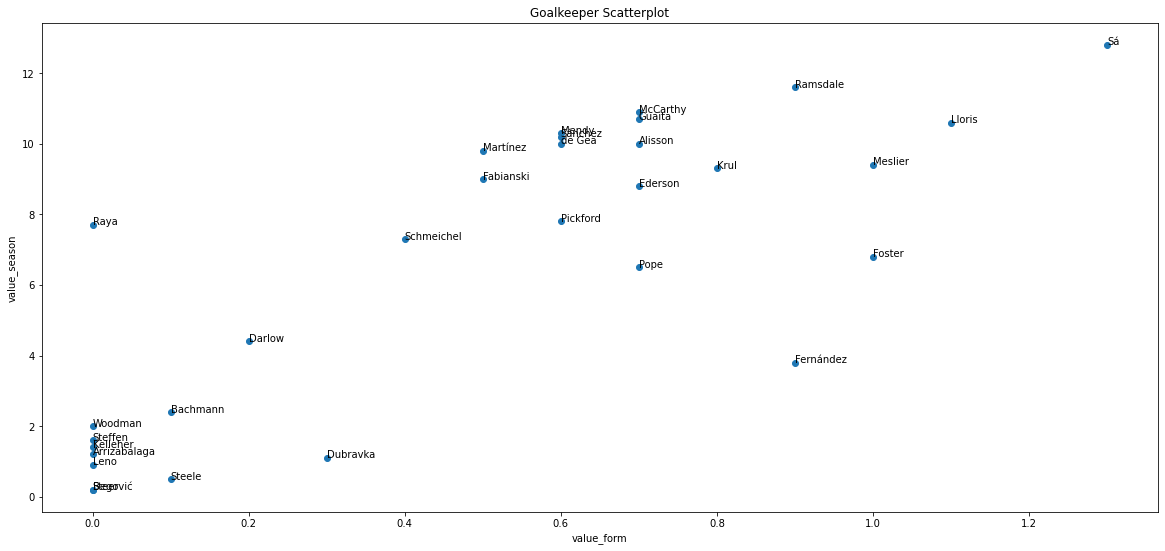

In [29]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(gk_df.value_form, gk_df.value_season)
ax.set_xlabel('value_form')
ax.set_ylabel('value_season')
ax.set_title('Goalkeeper Scatterplot')

for i, txt in enumerate(gk_df.web_name):
    ax.annotate(txt, (gk_df.value_form.iat[i], gk_df.value_season.iat[i]))
plt.show()

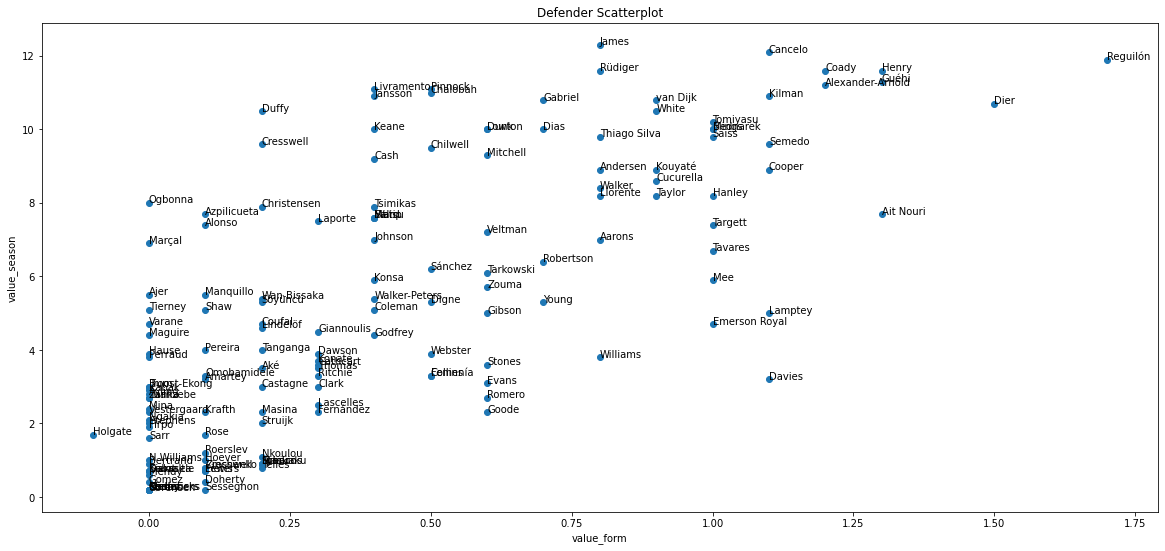

In [30]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(def_df.value_form, def_df.value_season)
ax.set_xlabel('value_form')
ax.set_ylabel('value_season')
ax.set_title('Defender Scatterplot')

for i, txt in enumerate(def_df.web_name):
    ax.annotate(txt, (def_df.value_form.iat[i], def_df.value_season.iat[i]))
plt.show()

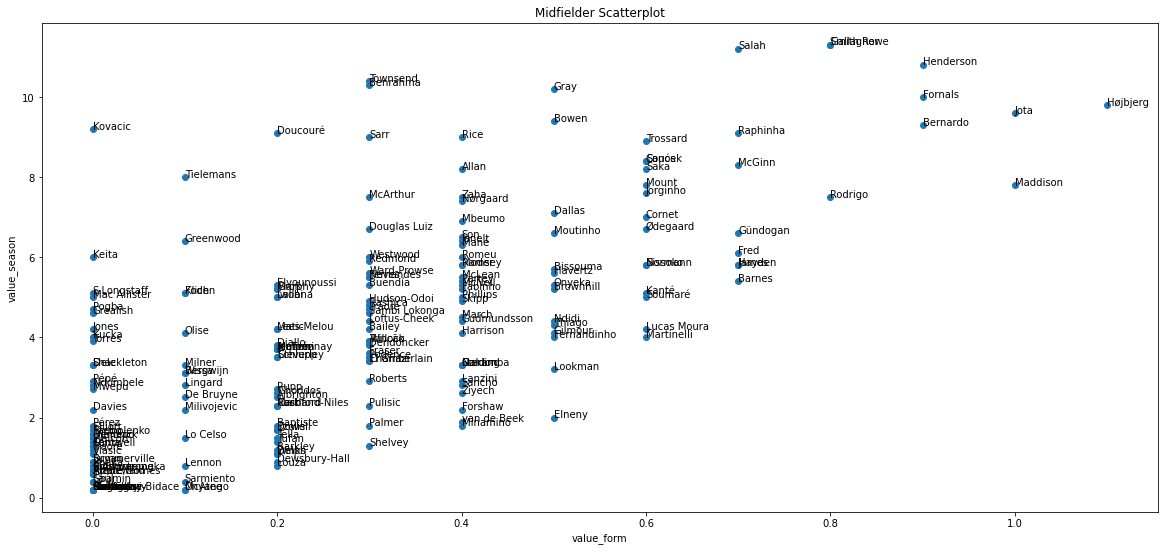

In [31]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(mid_df.value_form, mid_df.value_season)
ax.set_xlabel('value_form')
ax.set_ylabel('value_season')
ax.set_title('Midfielder Scatterplot')

for i, txt in enumerate(mid_df.web_name):
    ax.annotate(txt, (mid_df.value_form.iat[i], mid_df.value_season.iat[i]))
plt.show()

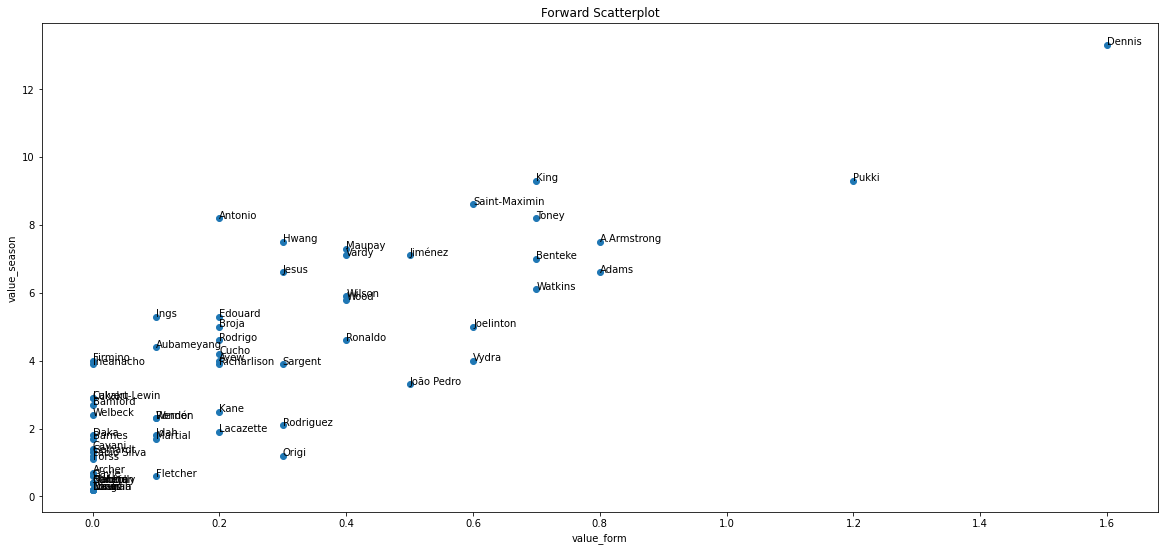

In [32]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(fwd_df.value_form, fwd_df.value_season)
ax.set_xlabel('value_form')
ax.set_ylabel('value_season')
ax.set_title('Forward Scatterplot')

for i, txt in enumerate(fwd_df.web_name):
    ax.annotate(txt, (fwd_df.value_form.iat[i], fwd_df.value_season.iat[i]))
plt.show()

## Team of Top Value Players

In [33]:
top2_gk_df = gk_df.nlargest(2, 'value_form_season')
top5_def_df = def_df.nlargest(5, 'value_form_season')
top5_mid_df = mid_df.nlargest(5, 'value_form_season')
top3_fwd_df = fwd_df.nlargest(3, 'value_form_season')

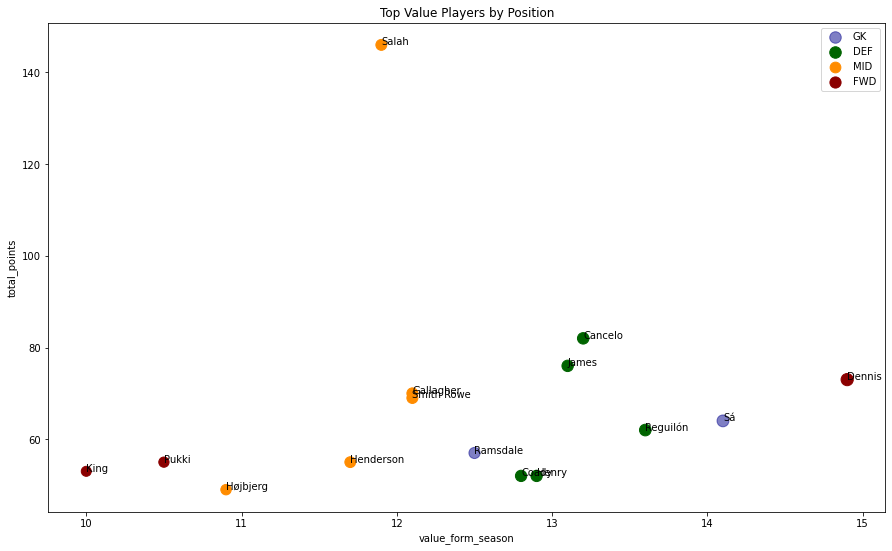

In [34]:
ax = top2_gk_df.plot.scatter(x='value_form_season', y='total_points', color='DarkBlue', label='GK', s=top2_gk_df['value_form_season']*10, alpha=.5, figsize=(15,9), title="Top Value Players by Position")
for i, txt in enumerate(top2_gk_df.web_name):
    ax.annotate(txt, (top2_gk_df.value_form_season.iat[i],top2_gk_df.total_points.iat[i]))
top5_def_df.plot.scatter(x='value_form_season', y='total_points', color='DarkGreen', label='DEF', s=top5_def_df['value_form_season']*10, ax=ax)
for i, txt in enumerate(top5_def_df.web_name):
    ax.annotate(txt, (top5_def_df.value_form_season.iat[i],top5_def_df.total_points.iat[i]))
top5_mid_df.plot.scatter(x='value_form_season', y='total_points', color='DarkOrange', label='MID', s=top5_mid_df['value_form_season']*10, ax=ax)
for i, txt in enumerate(top5_mid_df.web_name):
    ax.annotate(txt, (top5_mid_df.value_form_season.iat[i],top5_mid_df.total_points.iat[i]))
top3_fwd_df.plot.scatter(x='value_form_season', y='total_points', color='DarkRed', label='FWD', s=top3_fwd_df['value_form_season']*10, ax=ax)
for i, txt in enumerate(top3_fwd_df.web_name):
    ax.annotate(txt, (top3_fwd_df.value_form_season.iat[i],top3_fwd_df.total_points.iat[i]))

In [35]:
top2_gk_df

web_name    position     club  selected_by_percent  now_cost  \
551        Sá  Goalkeeper   Wolves                  2.9       5.0   
25   Ramsdale  Goalkeeper  Arsenal                 13.9       4.9   

     total_points  points_per_game  minutes  goals_scored  assists  \
551            64              4.6     1260             0        1   
25             57              5.2      990             0        0   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
551             5              12          0                0   
25              6              11          0                0   

     penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  \
551                 0             1          0     43      7  287      341.0   
25                  0             0          0     42      5  263      292.6   

     creativity  threat  ict_index  value_form  value_season  \
551        30.0     0.0       36.9         1.3          12.8   
25          0.0     0.0       29.3         0.9          11.6   

     value_form_season  
551               14.1  
25                12.5

In [36]:
top5_def_df

web_name  position       club  selected_by_percent  now_cost  \
462  Reguilón  Defender      Spurs                 17.4       5.2   
322   Cancelo  Defender   Man City                 38.4       6.8   
158     James  Defender    Chelsea                 34.0       6.2   
63      Henry  Defender  Brentford                  1.7       4.5   
532     Coady  Defender     Wolves                  6.0       4.5   

     total_points  points_per_game  minutes  goals_scored  assists  \
462            62              5.2     1041             1        3   
322            82              5.9     1247             0        5   
158            76              7.6      639             4        4   
63             52              3.7     1208             2        0   
532            52              3.7     1256             1        0   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
462             5              14          0                0   
322             8               7          0                0   
158             4               3          0                0   
63              4              19          0                0   
532             5              12          0                0   

     penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  \
462                 0             1          0      0      8  249      282.8   
322                 0             4          0      0     12  329      306.8   
158                 0             2          1      0     13  246      287.6   
63                  0             1          0      0      3  193      200.4   
532                 0             1          0      0      2  261      256.4   

     creativity  threat  ict_index  value_form  value_season  \
462       219.0   112.0       61.5         1.7          11.9   
322       303.5   331.0       94.2         1.1          12.1   
158       258.9   214.0       76.0         0.8          12.3   
63        132.1    90.0       42.4         1.3          11.6   
532         7.4    67.0       33.1         1.2          11.6   

     value_form_season  
462               13.6  
322               13.2  
158               13.1  
63                12.9  
532               12.8

In [37]:
top5_mid_df

web_name    position            club  selected_by_percent  now_cost  \
15   Smith Rowe  Midfielder         Arsenal                 29.8       6.1   
165   Gallagher  Midfielder  Crystal Palace                 26.6       6.2   
295       Salah  Midfielder       Liverpool                 73.0      13.0   
285   Henderson  Midfielder       Liverpool                  2.4       5.1   
457    Højbjerg  Midfielder           Spurs                  4.7       5.0   

     total_points  points_per_game  minutes  goals_scored  assists  \
15             69              4.9     1138             5        2   
165            70              5.4     1135             4        5   
295           146             10.4     1260            13        9   
285            55              4.2      979             2        3   
457            49              3.8     1169             2        1   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
15              5              20          0                0   
165             4              17          0                0   
295             8              12          0                0   
285             5              12          0                0   
457             5              17          0                0   

     penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  \
15                  0             0          0      0      6  246      317.2   
165                 0             4          0      0      9  236      364.8   
295                 0             1          0      0     19  442      689.2   
285                 0             1          0      0      8  226      268.8   
457                 0             1          0      0      6  241      316.4   

     creativity  threat  ict_index  value_form  value_season  \
15        271.1   284.0       87.1         0.8          11.3   
165       352.6   382.0      109.9         0.8          11.3   
295       404.3   985.0      208.0         0.7          11.2   
285       309.3   109.0       68.6         0.9          10.8   
457       128.0   133.0       57.8         1.1           9.8   

     value_form_season  
15                12.1  
165               12.1  
295               11.9  
285               11.7  
457               10.9

In [38]:
top3_fwd_df

web_name position     club  selected_by_percent  now_cost  total_points  \
494   Dennis  Forward  Watford                 18.4       5.5            73   
402    Pukki  Forward  Norwich                  5.9       5.9            55   
496     King  Forward  Watford                  5.3       5.7            53   

     points_per_game  minutes  goals_scored  assists  clean_sheets  \
494              5.6      988             6        6             1   
402              3.9     1189             5        0             3   
496              4.4      906             5        3             0   

     goals_conceded  own_goals  penalties_saved  penalties_missed  \
494              20          0                0                 0   
402              26          0                0                 0   
496              15          0                0                 0   

     yellow_cards  red_cards  saves  bonus  bps  influence  creativity  \
494             6          0      0     12  257      361.6       212.1   
402             1          0      0      8  174      195.4       102.6   
496             2          0      0      5  189      266.4       205.6   

     threat  ict_index  value_form  value_season  value_form_season  
494   450.0      102.4         1.6          13.3               14.9  
402   438.0       73.8         1.2           9.3               10.5  
496   432.0       90.5         0.7           9.3               10.0

In [39]:
# concat the dataframes for goalkeeper, defender, midfielder and forward
frames = [top2_gk_df, top5_def_df, top5_mid_df, top3_fwd_df]
best_team = pd.concat(frames)
best_team

web_name    position            club  selected_by_percent  now_cost  \
551          Sá  Goalkeeper          Wolves                  2.9       5.0   
25     Ramsdale  Goalkeeper         Arsenal                 13.9       4.9   
462    Reguilón    Defender           Spurs                 17.4       5.2   
322     Cancelo    Defender        Man City                 38.4       6.8   
158       James    Defender         Chelsea                 34.0       6.2   
63        Henry    Defender       Brentford                  1.7       4.5   
532       Coady    Defender          Wolves                  6.0       4.5   
15   Smith Rowe  Midfielder         Arsenal                 29.8       6.1   
165   Gallagher  Midfielder  Crystal Palace                 26.6       6.2   
295       Salah  Midfielder       Liverpool                 73.0      13.0   
285   Henderson  Midfielder       Liverpool                  2.4       5.1   
457    Højbjerg  Midfielder           Spurs                  4.7       5.0   
494      Dennis     Forward         Watford                 18.4       5.5   
402       Pukki     Forward         Norwich                  5.9       5.9   
496        King     Forward         Watford                  5.3       5.7   

     total_points  points_per_game  minutes  goals_scored  assists  \
551            64              4.6     1260             0        1   
25             57              5.2      990             0        0   
462            62              5.2     1041             1        3   
322            82              5.9     1247             0        5   
158            76              7.6      639             4        4   
63             52              3.7     1208             2        0   
532            52              3.7     1256             1        0   
15             69              4.9     1138             5        2   
165            70              5.4     1135             4        5   
295           146             10.4     1260            13        9   
285            55              4.2      979             2        3   
457            49              3.8     1169             2        1   
494            73              5.6      988             6        6   
402            55              3.9     1189             5        0   
496            53              4.4      906             5        3   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
551             5              12          0                0   
25              6              11          0                0   
462             5              14          0                0   
322             8               7          0                0   
158             4               3          0                0   
63              4              19          0                0   
532             5              12          0                0   
15              5              20          0                0   
165             4              17          0                0   
295             8              12          0                0   
285             5              12          0                0   
457             5              17          0                0   
494             1              20          0                0   
402             3              26          0                0   
496             0              15          0                0   

     penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  \
551                 0             1          0     43      7  287      341.0   
25                  0             0          0     42      5  263      292.6   
462                 0             1          0      0      8  249      282.8   
322                 0             4          0      0     12  329      306.8   
158                 0             2          1      0     13  246      287.6   
63                  0             1          0      0      3  193      200.4   
532                 0             1 

#### Remarks:
- This is the current best team based on _**['value_form_season']**_

## My Team Stats

In [40]:
my_team = ['Sánchez', 'Guaita', 'Cancelo', 'Duffy', 'James', 'Amartey', 'Johnson', 'Jota', 'Son', 'Salah', 'Maddison', 'Smith Rowe', 'Toney', 'Vardy', 'Dennis']
my_team_df = main_df[main_df['web_name'].isin(my_team)]
my_team_df

web_name    position            club  selected_by_percent  now_cost  \
15   Smith Rowe  Midfielder         Arsenal                 29.8       6.1   
58        Toney     Forward       Brentford                 22.1       6.7   
90        Duffy    Defender        Brighton                 19.7       4.2   
98      Sánchez  Goalkeeper        Brighton                 19.2       4.6   
158       James    Defender         Chelsea                 34.0       6.2   
166      Guaita  Goalkeeper  Crystal Palace                  8.0       4.6   
232       Vardy     Forward       Leicester                 26.9      10.7   
234     Amartey    Defender       Leicester                  9.0       3.8   
238    Maddison  Midfielder       Leicester                  7.1       6.7   
269       James  Midfielder           Leeds                  0.7       6.0   
295       Salah  Midfielder       Liverpool                 73.0      13.0   
302        Jota  Midfielder       Liverpool                 28.7       7.9   
322     Cancelo    Defender        Man City                 38.4       6.8   
451         Son  Midfielder           Spurs                 20.6      10.4   
459     Sánchez    Defender           Spurs                  1.0       4.5   
494      Dennis     Forward         Watford                 18.4       5.5   
523     Johnson    Defender        West Ham                  4.8       4.0   

     total_points  points_per_game  minutes  goals_scored  assists  \
15             69              4.9     1138             5        2   
58             55              3.9     1260             4        2   
90             44              3.7     1044             1        1   
98             47              3.6     1170             0        0   
158            76              7.6      639             4        4   
166            49              3.5     1260             0        0   
232            76              5.4     1205             9        1   
234            12              1.5      605             0        0   
238            52              3.7      825             3        2   
269            35              2.7      959             1        1   
295           146             10.4     1260            13        9   
302            76              5.8      919             8        1   
322            82              5.9     1247             0        5   
451            68              5.7     1048             5        2   
459            28              4.0      479             0        0   
494            73              5.6      988             6        6   
523            28              3.5      631             1        0   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
15              5              20          0                0   
58              4              19          0                0   
90              4              10          0                0   
98              5              13          0                0   
158             4               3          0                0   
166             4              20          0                0   
232             1              23          1                0   
234             1              13          0                0   
238             1              16          0                0   
269             3               9          0                0   
295             8              12          0                0   
302             8               7          0                0   
322             8               7          0                0   
451             5              14          0                0   
459             4               4          0                0   
494             1              20          0                0   
523             2               7          0                0   

     penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  \
15                  0             0          0      0      6  246      317.2   
58        

In [41]:
# filter players with same web_name
my_team_df.drop(index=[269,459], inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
my_team_df.sort_values(by='value_form_season', ascending=False)

web_name    position            club  selected_by_percent  now_cost  \
494      Dennis     Forward         Watford                 18.4       5.5   
322     Cancelo    Defender        Man City                 38.4       6.8   
158       James    Defender         Chelsea                 34.0       6.2   
15   Smith Rowe  Midfielder         Arsenal                 29.8       6.1   
295       Salah  Midfielder       Liverpool                 73.0      13.0   
166      Guaita  Goalkeeper  Crystal Palace                  8.0       4.6   
98      Sánchez  Goalkeeper        Brighton                 19.2       4.6   
90        Duffy    Defender        Brighton                 19.7       4.2   
302        Jota  Midfielder       Liverpool                 28.7       7.9   
58        Toney     Forward       Brentford                 22.1       6.7   
238    Maddison  Midfielder       Leicester                  7.1       6.7   
232       Vardy     Forward       Leicester                 26.9      10.7   
523     Johnson    Defender        West Ham                  4.8       4.0   
451         Son  Midfielder           Spurs                 20.6      10.4   
234     Amartey    Defender       Leicester                  9.0       3.8   

     total_points  points_per_game  minutes  goals_scored  assists  \
494            73              5.6      988             6        6   
322            82              5.9     1247             0        5   
158            76              7.6      639             4        4   
15             69              4.9     1138             5        2   
295           146             10.4     1260            13        9   
166            49              3.5     1260             0        0   
98             47              3.6     1170             0        0   
90             44              3.7     1044             1        1   
302            76              5.8      919             8        1   
58             55              3.9     1260             4        2   
238            52              3.7      825             3        2   
232            76              5.4     1205             9        1   
523            28              3.5      631             1        0   
451            68              5.7     1048             5        2   
234            12              1.5      605             0        0   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
494             1              20          0                0   
322             8               7          0                0   
158             4               3          0                0   
15              5              20          0                0   
295             8              12          0                0   
166             4              20          0                0   
98              5              13          0                0   
90              4              10          0                0   
302             8               7          0                0   
58              4              19          0                0   
238             1              16          0                0   
232             1              23          1                0   
523             2               7          0                0   
451             5              14          0                0   
234             1              13          0                0   

     penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  \
494                 0             6          0      0     12  257      361.6   
322                 0             4          0      0     12  329      306.8   
158                 0             2          1      0     13  246      287.6   
15                  0             0          0      0      6  246      317.2   
295                 0             1          0      0     19  442      689.2   
166                 0             1          0     40      3  260      308.2   
98                  0             2 

#### Remarks:
- Players at the bottom of this list are the ones whom I should transfer out as their stats based on _**['value_form_season']**_ are amongst the lowest

## Player Transfer Watchlist

In [43]:
gk_df_watchlist = gk_df.nlargest(7, 'value_form_season')
def_df_watchlist = def_df.nlargest(20, 'value_form_season')
mid_df_watchlist = mid_df.nlargest(20, 'value_form_season')
fwd_df_watchlist = fwd_df.nlargest(13, 'value_form_season')

In [44]:
gk_df_watchlist

web_name    position            club  selected_by_percent  now_cost  \
551        Sá  Goalkeeper          Wolves                  2.9       5.0   
25   Ramsdale  Goalkeeper         Arsenal                 13.9       4.9   
449    Lloris  Goalkeeper           Spurs                  8.7       5.4   
427  McCarthy  Goalkeeper     Southampton                  5.0       4.6   
166    Guaita  Goalkeeper  Crystal Palace                  8.0       4.6   
159     Mendy  Goalkeeper         Chelsea                 20.2       6.3   
98    Sánchez  Goalkeeper        Brighton                 19.2       4.6   

     total_points  points_per_game  minutes  goals_scored  assists  \
551            64              4.6     1260             0        1   
25             57              5.2      990             0        0   
449            57              4.4     1170             0        0   
427            50              3.6     1260             0        0   
166            49              3.5     1260             0        0   
159            65              5.0     1170             0        0   
98             47              3.6     1170             0        0   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
551             5              12          0                0   
25              6              11          0                0   
449             5              17          0                0   
427             5              20          0                0   
166             4              20          0                0   
159             7               6          0                0   
98              5              13          0                0   

     penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  \
551                 0             1          0     43      7  287      341.0   
25                  0             0          0     42      5  263      292.6   
449                 0             0          0     39      7  252      313.4   
427                 0             1          0     36      3  246      288.8   
166                 0             1          0     40      3  260      308.2   
159                 0             2          0     38      3  261      297.2   
98                  0             2          1     33      5  256      266.4   

     creativity  threat  ict_index  value_form  value_season  \
551        30.0     0.0       36.9         1.3          12.8   
25          0.0     0.0       29.3         0.9          11.6   
449        23.0     0.0       33.6         1.1          10.6   
427        10.0     0.0       30.0         0.7          10.9   
166         0.0     0.0       30.8         0.7          10.7   
159         0.0     0.0       29.6         0.6          10.3   
98         30.0     0.0       29.5         0.6          10.2   

     value_form_season  
551               14.1  
25                12.5  
449               11.7  
427               11.6  
166               11.4  
159               10.9  
98                10.8

In [45]:
def_df_watchlist

web_name  position            club  selected_by_percent  \
462          Reguilón  Defender           Spurs                 17.4   
322           Cancelo  Defender        Man City                 38.4   
158             James  Defender         Chelsea                 34.0   
63              Henry  Defender       Brentford                  1.7   
532             Coady  Defender          Wolves                  6.0   
186             Guéhi  Defender  Crystal Palace                  1.4   
146           Rüdiger  Defender         Chelsea                 22.2   
299  Alexander-Arnold  Defender       Liverpool                 39.4   
453              Dier  Defender           Spurs                  5.7   
542            Kilman  Defender          Wolves                  0.4   
291          van Dijk  Defender       Liverpool                 17.7   
71            Pinnock  Defender       Brentford                  5.4   
17            Gabriel  Defender         Arsenal                  3.0   
161          Chalobah  Defender         Chelsea                  3.9   
442        Livramento  Defender     Southampton                 21.9   
19              White  Defender         Arsenal                 11.9   
56            Jansson  Defender       Brentford                  7.9   
27           Tomiyasu  Defender         Arsenal                  4.2   
35              Mings  Defender     Aston Villa                  6.6   
434          Bednarek  Defender     Southampton                  0.8   

     now_cost  total_points  points_per_game  minutes  goals_scored  assists  \
462       5.2            62              5.2     1041             1        3   
322       6.8            82              5.9     1247             0        5   
158       6.2            76              7.6      639             4        4   
63        4.5            52              3.7     1208             2        0   
532       4.5            52              3.7     1256             1        0   
186       4.5            51              3.6     1260             2        0   
146       6.1            71              5.5     1170             2        1   
299       8.0            90              7.5     1053             1        7   
453       4.5            48              3.7     1091             0        1   
542       4.5            49              3.5     1260             1        0   
291       6.6            71              5.1     1260             1        1   
71        4.6            51              3.6     1167             1        1   
17        5.1            55              5.0      990             1        0   
161       4.8            53              5.9      692             2        0   
442       4.5            50              3.6     1255             1        1   
19        4.4            46              3.8     1080             0        0   
56        4.6            50              3.6     1251             0        3   
27        4.6            47              4.3      961             0        1   
35        4.9            49              3.8     1118             1        2   
434       4.4            44              4.0      894             1        0   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
462             5              14          0                0   
322             8               7          0                0   
158             4               3          0                0   
63              4              19          0                0   
532             5              12          0                0   
186             4              20          0                0   
146             7               6          0                0   
299             7              10          0                0   
453             5              14          1                0   
542             5              12          0                0   
291             8              12          0                0   
71              4              16      

In [46]:
mid_df_watchlist

web_name    position            club  selected_by_percent  now_cost  \
15   Smith Rowe  Midfielder         Arsenal                 29.8       6.1   
165   Gallagher  Midfielder  Crystal Palace                 26.6       6.2   
295       Salah  Midfielder       Liverpool                 73.0      13.0   
285   Henderson  Midfielder       Liverpool                  2.4       5.1   
457    Højbjerg  Midfielder           Spurs                  4.7       5.0   
521     Fornals  Midfielder        West Ham                  2.4       6.0   
212    Townsend  Midfielder         Everton                  7.6       5.4   
213        Gray  Midfielder         Everton                  9.3       5.5   
517    Benrahma  Midfielder        West Ham                 22.1       6.1   
302        Jota  Midfielder       Liverpool                 28.7       7.9   
327    Bernardo  Midfielder        Man City                 16.7       7.4   
518       Bowen  Midfielder        West Ham                  2.7       6.4   
264    Raphinha  Midfielder           Leeds                 21.0       6.7   
97     Trossard  Midfielder        Brighton                  2.9       6.5   
519        Rice  Midfielder        West Ham                  5.9       5.1   
489        Sarr  Midfielder         Watford                  4.7       5.9   
203    Doucouré  Midfielder         Everton                  1.6       5.4   
145     Kovacic  Midfielder         Chelsea                  2.4       5.0   
32       McGinn  Midfielder     Aston Villa                  1.3       5.8   
61        Canós  Midfielder       Brentford                  1.8       5.5   

     total_points  points_per_game  minutes  goals_scored  assists  \
15             69              4.9     1138             5        2   
165            70              5.4     1135             4        5   
295           146             10.4     1260            13        9   
285            55              4.2      979             2        3   
457            49              3.8     1169             2        1   
521            60              4.3     1197             4        3   
212            56              4.0     1110             3        2   
213            56              4.0     1058             4        2   
517            63              4.5     1114             3        3   
302            76              5.8      919             8        1   
327            69              5.3     1118             5        2   
518            60              4.3     1138             2        6   
264            61              5.1      997             6        0   
97             58              4.1     1226             3        1   
519            46              3.3     1260             1        3   
489            53              4.4     1030             5        0   
203            49              4.9      900             2        4   
145            46              5.1      702             1        5   
32             48              3.7     1119             3        1   
61             46              3.3     1149             1        3   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
15              5              20          0                0   
165             4              17          0                0   
295             8              12          0                0   
285             5              12          0                0   
457             5              17          0                0   
521             4              16          0                0   
212             3              21          0                0   
213             3              16          0                0   
517             4              14          0                0   
302             8               7          0                0   
327             7               7          0                0   
518             3              16          0                0   
264             3              16          0        

In [47]:
fwd_df_watchlist

web_name position            club  selected_by_percent  now_cost  \
494         Dennis  Forward         Watford                 18.4       5.5   
402          Pukki  Forward         Norwich                  5.9       5.9   
496           King  Forward         Watford                  5.3       5.7   
388  Saint-Maximin  Forward       Newcastle                 17.8       6.9   
58           Toney  Forward       Brentford                 22.1       6.7   
511        Antonio  Forward        West Ham                 39.3       8.0   
446    A.Armstrong  Forward     Southampton                  4.0       6.0   
554          Hwang  Forward          Wolves                  9.8       5.7   
96          Maupay  Forward        Brighton                  2.9       6.3   
169        Benteke  Forward  Crystal Palace                  3.0       6.4   
533        Jiménez  Forward          Wolves                 10.9       7.7   
232          Vardy  Forward       Leicester                 26.9      10.7   
435          Adams  Forward     Southampton                  1.6       6.8   

     total_points  points_per_game  minutes  goals_scored  assists  \
494            73              5.6      988             6        6   
402            55              3.9     1189             5        0   
496            53              4.4      906             5        3   
388            59              4.2     1236             3        4   
58             55              3.9     1260             4        2   
511            66              5.1     1168             6        4   
446            45              3.5     1037             2        3   
554            43              3.9      865             4        0   
96             46              3.5      924             5        0   
169            45              3.2      878             4        1   
533            55              3.9     1171             3        3   
232            76              5.4     1205             9        1   
435            45              4.1      767             3        2   

     clean_sheets  goals_conceded  own_goals  penalties_saved  \
494             1              20          0                0   
402             3              26          0                0   
496             0              15          0                0   
388             1              29          0                0   
58              4              19          0                0   
511             3              15          0                0   
446             4              18          0                0   
554             4               7          0                0   
96              4              12          0                0   
169             3              14          0                0   
533             5              10          0                0   
232             1              23          1                0   
435             3              12          0                0   

     penalties_missed  yellow_cards  red_cards  saves  bonus  bps  influence  \
494                 0             6          0      0     12  257      361.6   
402                 0             1          0      0      8  174      195.4   
496                 0             2          0      0      5  189      266.4   
388                 0             2          0      0      9  213      283.4   
58                  0             2          0      0      7  191      280.4   
511                 1             3          1      0     12  233      324.4   
446                 0             0          0      0      3  129      170.0   
554                 0             1          0      0      8  163      190.8   
96                  0             4          0      0      8  153      195.0   
169                 0             3          0      0      6  152      228.8   
533                 0             2          0      0      9  148      216.8   
232                 0             2          0      0     14  271

Reference:
#### FPL Website
https://fantasy.premierleague.com/
#### David Allen
https://towardsdatascience.com/fantasy-premier-league-value-analysis-python-tutorial-using-the-fpl-api-8031edfe9910#99db
#### Charlie Byatt
https://towardsdatascience.com/python-for-fpl-data-analytics-dadb414ccefd